In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fibe-text-class-downsampling/__results__.html
/kaggle/input/fibe-text-class-downsampling/downsampled_df.csv
/kaggle/input/fibe-text-class-downsampling/sample_df.csv
/kaggle/input/fibe-text-class-downsampling/__notebook__.ipynb
/kaggle/input/fibe-text-class-downsampling/__output__.json
/kaggle/input/fibe-text-class-downsampling/test_df.csv
/kaggle/input/fibe-text-class-downsampling/custom.css
/kaggle/input/fibe-text-class-downsampling/__results___files/__results___8_0.png


In [7]:
import tqdm as tq

In [8]:
train_ds_path = '/kaggle/input/fibe-text-class-downsampling/downsampled_df.csv'
sample_path = '/kaggle/input/fibe-text-class-downsampling/sample_df.csv'


In [9]:
import time as t

In [10]:
def calculate_time(start_time,end_time):
    elapsed_time = end_time - start_time
    return f'The elapsed time is {elapsed_time} secs'


In [11]:
st = t.time()
# 697527
# train_df = pd.read_csv(train_ds_path,encoding='ISO-8859-1', nrows=200000)
train_df = pd.read_csv(train_ds_path,encoding='ISO-8859-1')
et = t.time()
calculate_time(st,et)

'The elapsed time is 6.26823878288269 secs'

In [12]:
train_df.head()

,text,target,Word Count
0,NEW DELHI: Students aspiring for admission int...,academic interests,284
1,GUWAHATI: The state education department mulle...,academic interests,287
2,New Delhi:Delhi University has decided to incr...,academic interests,458
3,NEW DELHI: In a first of kind of educational p...,academic interests,500
4,Karnataka 1oth Hall Ticket 2023: The Karnataka...,academic interests,267


In [13]:
train_df.shape

(209064, 3)

In [14]:
train_df.target.value_counts()

target
academic interests                           17545
books and literature                         12125
healthy living                                9281
careers                                       9077
news and politics                             9055
shopping                                      8840
style and fashion                             8737
family and relationships                      8682
business and finance                          8404
automotives                                   8395
pharmaceuticals, conditions, and symptoms     7978
arts and culture                              7902
sports                                        7359
pets                                          7236
hobbies and interests                         7180
real estate                                   7147
food and drinks                               7027
home and garden                               6900
video gaming                                  6882
movies                  

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

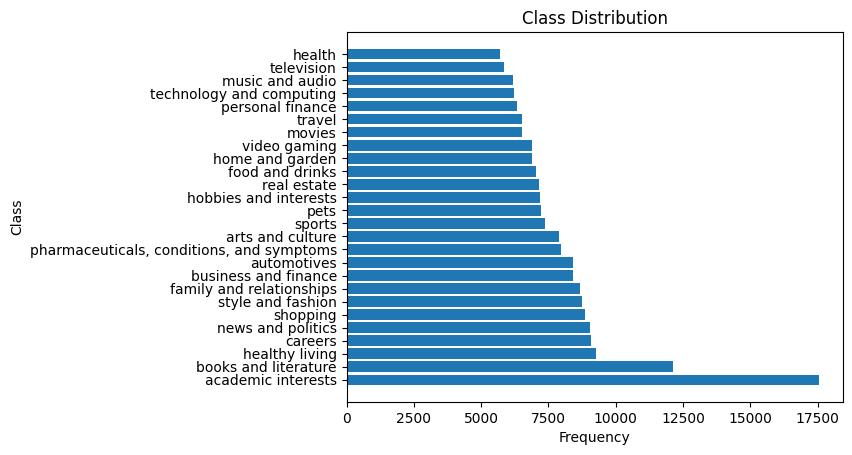

In [16]:
# Set the figure size to increase the width
# plt.figure(figsize=(12, 6))  # Adjust the width (12 inches) as needed

# Count the occurrences of each class
class_counts = train_df['target'].value_counts()

# Create a horizontal bar plot
plt.barh(class_counts.index, class_counts)

# Customize the plot
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.title('Class Distribution')

# Show the plot
plt.show()

In [17]:
classes = train_df['target'].unique()
len(classes), classes

(26,
 array(['academic interests', 'arts and culture', 'automotives',
        'books and literature', 'business and finance', 'careers',
        'family and relationships', 'food and drinks', 'health',
        'healthy living', 'hobbies and interests', 'home and garden',
        'movies', 'music and audio', 'news and politics',
        'personal finance', 'pets',
        'pharmaceuticals, conditions, and symptoms', 'real estate',
        'shopping', 'sports', 'style and fashion',
        'technology and computing', 'television', 'travel', 'video gaming'],
       dtype=object))

In [18]:
train_df.describe(include='object')

,text,target
count,209064,209064
unique,209055,26
top,"probots - largest diy electronics, robotics & ...",academic interests
freq,2,17545


In [19]:
train_df.describe()

,Word Count
count,209064.000000
mean,305.440851
std,137.816631
min,100.000000
25%,179.000000
50%,290.000000
75%,444.000000
max,500.000000


In [20]:
duplicate_rows = train_df[train_df['text'].duplicated()]
duplicate_rows


,text,target,Word Count
50381,rheinmetall defence and security solutions to...,business and finance,120
53140,"dortech direct: glazing tools, glass lifters, ...",business and finance,105
59475,An excellent chance to progress your career wi...,careers,225
76667,the healthy cooking source healthy cooking re...,food and drinks,181
82387,"canada - online brace store - knees, feet, ank...",health,104
134881,The scope and attractiveness of alternative in...,personal finance,154
165386,"venta mart i electronic, car, fashions and mor...",shopping,136
186057,"probots - largest diy electronics, robotics & ...",technology and computing,124
189607,"buy online | laptops, phones, tablets, inks, t...",technology and computing,155


# Tokenization

In [21]:
from datasets import Dataset,DatasetDict,ClassLabel

In [22]:
ds = Dataset.from_pandas(train_df)

In [23]:
ds

Dataset({
    features: ['text', 'target', 'Word Count'],
    num_rows: 209064
})

In [24]:
feat_news_cat = ClassLabel(num_classes = len(classes),names=classes.tolist())

In [25]:
ds = ds.cast_column("target", feat_news_cat)

Casting the dataset:   0%|          | 0/209064 [00:00<?, ? examples/s]

In [26]:
ds.features


{'text': Value(dtype='string', id=None),
 'target': ClassLabel(names=['academic interests', 'arts and culture', 'automotives', 'books and literature', 'business and finance', 'careers', 'family and relationships', 'food and drinks', 'health', 'healthy living', 'hobbies and interests', 'home and garden', 'movies', 'music and audio', 'news and politics', 'personal finance', 'pets', 'pharmaceuticals, conditions, and symptoms', 'real estate', 'shopping', 'sports', 'style and fashion', 'technology and computing', 'television', 'travel', 'video gaming'], id=None),
 'Word Count': Value(dtype='int64', id=None)}

In [27]:
from transformers import AutoTokenizer 

In [28]:
model_nm = 'distilbert/distilbert-base-uncased'


In [29]:
tokz = AutoTokenizer.from_pretrained(model_nm)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [30]:
def tok_func(row):
    return tokz(row["text"],truncation=True,max_length=512)

In [31]:
ds[0], ds.features['target'].int2str(ds[0]['target'])

({'text': 'NEW DELHI: Students aspiring for admission into medical colleges are likely to face a common medical entrance test this year itself but in a phased manner. In its tentative schedule to be presented to the Supreme Court on Thursday, the health ministry is likely to suggest that the All India Pre-Medical Entrance Test, 2016 (AIPMT) slated for May 1 be treated as Phase I of National Eligibility Entrance Test (NEET). The Phase II of NEET can be conducted in mid-July for the rest of the candidates, who have not applied for AIPMT this year, official sources told TOI. However, apart from AIPMT, a slew of medical entrance tests slated to happen over the next couple of months are expected to be scrapped in the light of the SC directive."We have worked out a tentative schedule which will be submitted to the SC. Since it is too late to conduct a fresh test, we will suggest that All India PMT be treated as Phase 1 of NEET and a second phase can be conducted separately for those who have

In [32]:
print(tok_func(ds[0]))

{'input_ids': [101, 2047, 6768, 1024, 2493, 22344, 2005, 9634, 2046, 2966, 6667, 2024, 3497, 2000, 2227, 1037, 2691, 2966, 4211, 3231, 2023, 2095, 2993, 2021, 1999, 1037, 21718, 5450, 1012, 1999, 2049, 19943, 6134, 2000, 2022, 3591, 2000, 1996, 4259, 2457, 2006, 9432, 1010, 1996, 2740, 3757, 2003, 3497, 2000, 6592, 2008, 1996, 2035, 2634, 3653, 1011, 2966, 4211, 3231, 1010, 2355, 1006, 9932, 9737, 2102, 1007, 18517, 2005, 2089, 1015, 2022, 5845, 2004, 4403, 1045, 1997, 2120, 11395, 4211, 3231, 1006, 7663, 2102, 1007, 1012, 1996, 4403, 2462, 1997, 7663, 2102, 2064, 2022, 4146, 1999, 3054, 1011, 2251, 2005, 1996, 2717, 1997, 1996, 5347, 1010, 2040, 2031, 2025, 4162, 2005, 9932, 9737, 2102, 2023, 2095, 1010, 2880, 4216, 2409, 2000, 2072, 1012, 2174, 1010, 4237, 2013, 9932, 9737, 2102, 1010, 1037, 22889, 7974, 1997, 2966, 4211, 5852, 18517, 2000, 4148, 2058, 1996, 2279, 3232, 1997, 2706, 2024, 3517, 2000, 2022, 14553, 1999, 1996, 2422, 1997, 1996, 8040, 16449, 1012, 1000, 2057, 2031, 2499,

In [33]:
token_ids = tok_func(ds[0])['input_ids']
token_ids

[101,
 2047,
 6768,
 1024,
 2493,
 22344,
 2005,
 9634,
 2046,
 2966,
 6667,
 2024,
 3497,
 2000,
 2227,
 1037,
 2691,
 2966,
 4211,
 3231,
 2023,
 2095,
 2993,
 2021,
 1999,
 1037,
 21718,
 5450,
 1012,
 1999,
 2049,
 19943,
 6134,
 2000,
 2022,
 3591,
 2000,
 1996,
 4259,
 2457,
 2006,
 9432,
 1010,
 1996,
 2740,
 3757,
 2003,
 3497,
 2000,
 6592,
 2008,
 1996,
 2035,
 2634,
 3653,
 1011,
 2966,
 4211,
 3231,
 1010,
 2355,
 1006,
 9932,
 9737,
 2102,
 1007,
 18517,
 2005,
 2089,
 1015,
 2022,
 5845,
 2004,
 4403,
 1045,
 1997,
 2120,
 11395,
 4211,
 3231,
 1006,
 7663,
 2102,
 1007,
 1012,
 1996,
 4403,
 2462,
 1997,
 7663,
 2102,
 2064,
 2022,
 4146,
 1999,
 3054,
 1011,
 2251,
 2005,
 1996,
 2717,
 1997,
 1996,
 5347,
 1010,
 2040,
 2031,
 2025,
 4162,
 2005,
 9932,
 9737,
 2102,
 2023,
 2095,
 1010,
 2880,
 4216,
 2409,
 2000,
 2072,
 1012,
 2174,
 1010,
 4237,
 2013,
 9932,
 9737,
 2102,
 1010,
 1037,
 22889,
 7974,
 1997,
 2966,
 4211,
 5852,
 18517,
 2000,
 4148,
 2058,
 1996,


In [34]:
tokz.convert_ids_to_tokens(token_ids)

['[CLS]',
 'new',
 'delhi',
 ':',
 'students',
 'aspiring',
 'for',
 'admission',
 'into',
 'medical',
 'colleges',
 'are',
 'likely',
 'to',
 'face',
 'a',
 'common',
 'medical',
 'entrance',
 'test',
 'this',
 'year',
 'itself',
 'but',
 'in',
 'a',
 'phased',
 'manner',
 '.',
 'in',
 'its',
 'tentative',
 'schedule',
 'to',
 'be',
 'presented',
 'to',
 'the',
 'supreme',
 'court',
 'on',
 'thursday',
 ',',
 'the',
 'health',
 'ministry',
 'is',
 'likely',
 'to',
 'suggest',
 'that',
 'the',
 'all',
 'india',
 'pre',
 '-',
 'medical',
 'entrance',
 'test',
 ',',
 '2016',
 '(',
 'ai',
 '##pm',
 '##t',
 ')',
 'slated',
 'for',
 'may',
 '1',
 'be',
 'treated',
 'as',
 'phase',
 'i',
 'of',
 'national',
 'eligibility',
 'entrance',
 'test',
 '(',
 'nee',
 '##t',
 ')',
 '.',
 'the',
 'phase',
 'ii',
 'of',
 'nee',
 '##t',
 'can',
 'be',
 'conducted',
 'in',
 'mid',
 '-',
 'july',
 'for',
 'the',
 'rest',
 'of',
 'the',
 'candidates',
 ',',
 'who',
 'have',
 'not',
 'applied',
 'for',
 'ai

## Tokenized dataset

In [35]:
tok_ds = ds.map(tok_func, batched=True, batch_size=10000, num_proc=2)

Map (num_proc=2):   0%|          | 0/209064 [00:00<?, ? examples/s]

In [36]:
tok_ds = tok_ds.rename_columns({'target':'labels'})

In [37]:
ds, tok_ds

(Dataset({
     features: ['text', 'target', 'Word Count'],
     num_rows: 209064
 }),
 Dataset({
     features: ['text', 'labels', 'Word Count', 'input_ids', 'attention_mask'],
     num_rows: 209064
 }))

# Test and validation sets

## validation set - how we are doing with the training of model

In [38]:
dds = tok_ds.train_test_split(0.25, seed=42)
dds


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'Word Count', 'input_ids', 'attention_mask'],
        num_rows: 156798
    })
    test: Dataset({
        features: ['text', 'labels', 'Word Count', 'input_ids', 'attention_mask'],
        num_rows: 52266
    })
})

## Test set - how are we performing on the metrics

In [39]:
test_ds_path = '/kaggle/input/fibe-text-class-downsampling/test_df.csv'


In [40]:
eval_df = pd.read_csv(test_ds_path, encoding='ISO-8859-1')

In [41]:
eval_df.describe(include='object')

,text,Index
count,174382,174382
unique,174316,174382
top,"introduction as a data scientist at ibm, you w...",Article_174381
freq,8,1


In [42]:
eval_df.describe()

,Word Count
count,174382.000000
mean,305.557902
std,137.787736
min,100.000000
25%,179.000000
50%,290.000000
75%,444.000000
max,500.000000


In [43]:
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True, batch_size=10000, num_proc=2)

Map (num_proc=2):   0%|          | 0/174382 [00:00<?, ? examples/s]

## Evaluation metrics

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [45]:
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    
    precision = precision_score(labels, predictions, average='weighted') # because multi-label 
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')
    accuracy = accuracy_score(labels, predictions)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

# Training model

In [46]:
samples = dds['train'][:10]
samples = {k: v for k, v in samples.items() if k not in ['text','Word Count']}
[len(x) for x in samples["input_ids"]]

[167, 412, 316, 512, 273, 286, 200, 411, 373, 512]

In [47]:
dds['train'][0]

{'text': "I had no idea GirlOnline would take off the way it has - I can't believe I now have 5432 followers, thanks so much! - and the thought of opening up to you all about this is terrifying, but here goes...Penny has a secret.Under the alias GirlOnline, she blogs about school dramas, boys, her mad, whirlwind family - and the panic attacks she's suffered from lately. When things go from bad to worse, her family whisks her away to New York, where she meets the gorgeous, guitar-strumming Noah. Suddenly Penny is falling in love - and capturing every moment of it on her blog.But Noah has a secret too. One that threatens to ruin Penny's cover - and her closest friendship - forever.",
 'labels': 3,
 'Word Count': 123,
 'input_ids': [101,
  1045,
  2018,
  2053,
  2801,
  2611,
  2239,
  4179,
  2052,
  2202,
  2125,
  1996,
  2126,
  2009,
  2038,
  1011,
  1045,
  2064,
  1005,
  1056,
  2903,
  1045,
  2085,
  2031,
  5139,
  16703,
  8771,
  1010,
  4283,
  2061,
  2172,
  999,
  1011,

## For dynamic padding

In [48]:
from transformers import DataCollatorWithPadding

In [49]:
data_collator = DataCollatorWithPadding(tokenizer=tokz, padding= True)

In [50]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

{'labels': torch.Size([10]),
 'input_ids': torch.Size([10, 512]),
 'attention_mask': torch.Size([10, 512])}

In [51]:
dds['train'].features

{'text': Value(dtype='string', id=None),
 'labels': ClassLabel(names=['academic interests', 'arts and culture', 'automotives', 'books and literature', 'business and finance', 'careers', 'family and relationships', 'food and drinks', 'health', 'healthy living', 'hobbies and interests', 'home and garden', 'movies', 'music and audio', 'news and politics', 'personal finance', 'pets', 'pharmaceuticals, conditions, and symptoms', 'real estate', 'shopping', 'sports', 'style and fashion', 'technology and computing', 'television', 'travel', 'video gaming'], id=None),
 'Word Count': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

## Id <> labels Mapping

In [52]:
id2label = {}
label2id = {}

for i, label in enumerate(classes):
    id2label[i] = label
    label2id[label] = i

print(f'id2label: \n \n {id2label} \n\n  label2id: \n\n  {label2id}')

id2label: 
 
 {0: 'academic interests', 1: 'arts and culture', 2: 'automotives', 3: 'books and literature', 4: 'business and finance', 5: 'careers', 6: 'family and relationships', 7: 'food and drinks', 8: 'health', 9: 'healthy living', 10: 'hobbies and interests', 11: 'home and garden', 12: 'movies', 13: 'music and audio', 14: 'news and politics', 15: 'personal finance', 16: 'pets', 17: 'pharmaceuticals, conditions, and symptoms', 18: 'real estate', 19: 'shopping', 20: 'sports', 21: 'style and fashion', 22: 'technology and computing', 23: 'television', 24: 'travel', 25: 'video gaming'} 

  label2id: 

  {'academic interests': 0, 'arts and culture': 1, 'automotives': 2, 'books and literature': 3, 'business and finance': 4, 'careers': 5, 'family and relationships': 6, 'food and drinks': 7, 'health': 8, 'healthy living': 9, 'hobbies and interests': 10, 'home and garden': 11, 'movies': 12, 'music and audio': 13, 'news and politics': 14, 'personal finance': 15, 'pets': 16, 'pharmaceuticals,

## Training our model

In [53]:
from transformers import AutoModelForSequenceClassification

In [54]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, 
                                                           num_labels=len(classes),
                                                          id2label=id2label, 
                                                           label2id=label2id)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [56]:
from transformers import TrainingArguments,Trainer

In [57]:
bs = 16
epochs = 3

In [58]:
lr = 3e-5

In [59]:
args = TrainingArguments('outputs', 
                         learning_rate=lr, 
                         warmup_ratio=0.1, 
                         lr_scheduler_type='cosine',
#                          lr_scheduler_type='cosine_with_restarts', # A schedule that combines the cosine schedule with periodic restarts, which can help prevent the model from getting stuck in local minima.
                         overwrite_output_dir=True, # This reduces the amt of disk space that gets used.                         
                         fp16=True,
                         eval_strategy="epoch",
                         per_device_train_batch_size=bs,
                         per_device_eval_batch_size=bs*2,
                         num_train_epochs=epochs, 
                         weight_decay=0.01, 
                         report_to='none')

In [60]:
trainer = Trainer(model = model, 
                  args = args, 
                  train_dataset=dds['train'], 
                  eval_dataset=dds['test'],
                  tokenizer=tokz,
                  data_collator = data_collator, 
                  compute_metrics=compute_metrics)

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [61]:
start_time = t.time()
trainer.train();
end_time = t.time()
calculate_time(start_time,end_time)

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.636000,0.621726,0.835027,0.827498,0.828200,0.827498


SafetensorError: Error while serializing: IoError(Os { code: 28, kind: StorageFull, message: "No space left on device" })

For eavery epoch teh validation happens which is not shown in the output cell:
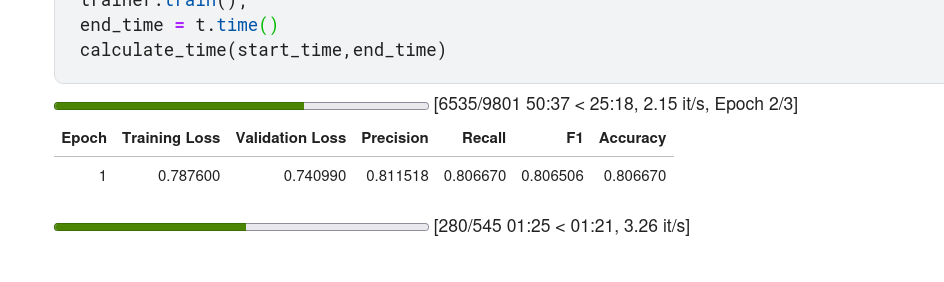

In [ ]:
trainer.save_model("./best_model")

In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

In [ ]:
trainer.push_to_hub("pknayak/hackathon-bert-news-class") # the model is not being properly; check how to create replace the existing model

# Inferences:

While inferencing try to use the predict code snippet from the [repo](https://github.com/MekongDelta-mind/LLM-FineTuning-Large-Language-Models/blob/main/Other-Language_Models_BERT_related/FineTuning_BERT_for_Multi_Class_Classification_Turkish/Multi-class_Classification.ipynb)

If it doesn't work then use the [notbeook's](https://www.kaggle.com/code/pknayak/fibe-text-classification#Inferences-on-the-test-data) to inference part 

## Loading model fomr HUB

In [ ]:
from huggingface_hub import notebook_login


In [ ]:
notebook_login()


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import AutoTokenizer 
# from transformers import default_data_collator
from transformers import DataCollatorWithPadding

In [ ]:
# model_path= 'pknayak/bert-news-class'
model_path= 'pknayak/outputs'


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding= True)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [ ]:
trainer = Trainer(
    model,
    #args,
    #train_dataset=tokenized_train,
    #eval_dataset=tokenized_val,
    data_collator=data_collator,
    #tokenizer=tokenizer,
    )

## Create the test dataset

In [ ]:
test_ds_path = '/kaggle/input/fibe-text-class-downsampling/test_df.csv'
eval_df = pd.read_csv(test_ds_path, encoding='ISO-8859-1')

In [ ]:
eval_df.head()

In [ ]:
eval_df.text.map(len)

In [ ]:
from datasets import Dataset

In [ ]:
eval_ds = Dataset.from_pandas(eval_df)

In [ ]:
eval_ds, eval_ds.column_names

In [ ]:
def test_tokenize(batch):
    texts = [str(text) for text in batch['text']] # convert all to str
    return tokenizer(texts,truncation=True,max_length=512)

In [ ]:
# tokenization using the model's tokenizer
test_features = eval_ds.map(
                test_tokenize,
                batched=True,
                remove_columns=eval_ds.column_names
                )

In [ ]:
test_features # tokenized dataset NOT simple Dataset

In [ ]:
preds = trainer.predict(test_features)
# authorize and add the API key from the new window

`NOTE:` This wandb authentication is annoying. Try to use only the model instead of trainer. This will a good side task to work on.

In [ ]:
preds

In [ ]:
result = preds.predictions.argmax(axis=1)

In [ ]:
result = pd.DataFrame(result, columns=["pred"])


In [ ]:
result['pred'].value_counts()

In [ ]:
result.head()

In [ ]:
pred_label_idx = result['pred'][:5]
pred_label_idx

In [ ]:
model.config.id2label[pred_label_idx[0]], model.config.id2label[pred_label_idx[1]]


In [ ]:
def convert_to_labels(idx, model):
    return model.config.id2label[int(idx)]

In [ ]:
result['target'] = result['pred'].map(lambda x: convert_to_labels(x, model))

In [ ]:
result['Index'] = eval_df['Index']

In [ ]:
result = result[["Index", "target"]]

the submission file should have columns `target` and `Index`

|target | Index |
|:--|:--|
|academic interests | Article_502 |
|academic interests | Article_4578|

In [ ]:
result.head()

In [ ]:
result.to_csv("submission.csv", index=False)